In [1]:
# Importing Basic librarys.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("C:\\Users\\DELL\\Desktop\\incident_event_log.csv")

In [3]:
# Replacing "?" with nan values

data[data == '?']= np.nan

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [4]:
# Since caused_by,vendor,rfc,problem_id and cmdb_ci have more than 50% of missing data we have to remove it.


data.drop(['caused_by','vendor','rfc','problem_id','cmdb_ci'], axis=1,inplace=True)

In [5]:
# Fill Nan values with mode

variable=data.columns[data.isna().any()].tolist()
variable

['caller_id',
 'opened_by',
 'sys_created_by',
 'sys_created_at',
 'location',
 'category',
 'subcategory',
 'u_symptom',
 'assignment_group',
 'assigned_to',
 'closed_code',
 'resolved_by',
 'resolved_at']

In [6]:
# Fill Nan values with mode
for i in ['caller_id','opened_by','sys_created_by','sys_created_at','location','category','subcategory','u_symptom','assignment_group','assigned_to','closed_code','resolved_by','resolved_at']:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [7]:
data["caller_id"]=data["caller_id"].apply(lambda x: int(x.split(' ')[-1]))
data["opened_by"]=data["opened_by"].apply(lambda x: int(x.split(' ')[-1]))
data["sys_created_by"]=data["sys_created_by"].apply(lambda x: int(x.split(' ')[-1]))
data["sys_updated_by"]=data["sys_updated_by"].apply(lambda x: int(x.split(' ')[-1]))
data["location"]=data["location"].apply(lambda x: int(x.split(' ')[-1]))
data["category"]=data["category"].apply(lambda x: int(x.split(' ')[-1]))
data["subcategory"]=data["subcategory"].apply(lambda x: int(x.split(' ')[-1]))
data["u_symptom"]=data["u_symptom"].apply(lambda x: int(x.split(' ')[-1]))
data["impact"]=data["impact"].apply(lambda x: int(x.split(' ')[0]))
data["urgency"]=data["urgency"].apply(lambda x: int(x.split(' ')[0]))
data["priority"]=data["priority"].apply(lambda x: int(x.split(' ')[0]))
data["assignment_group"]=data["assignment_group"].apply(lambda x: int(x.split(' ')[-1]))
data["assigned_to"]=data["assigned_to"].apply(lambda x: int(x.split(' ')[-1]))
data["closed_code"]=data["closed_code"].apply(lambda x: int(x.split(' ')[-1]))
data["resolved_by"]=data["resolved_by"].apply(lambda x: int(x.split(' ')[-1]))

In [8]:
data['opened_at']=pd.to_datetime(data['opened_at'])
data['sys_created_at']=pd.to_datetime(data['sys_created_at'])
data['sys_updated_at']=pd.to_datetime(data['sys_updated_at'])
data['resolved_at']=pd.to_datetime(data['resolved_at'])
data['closed_at']=pd.to_datetime(data['closed_at'])

In [9]:
# different column has been created for day,date & year inorder to perform feature selection


data["updated_day"]=pd.to_datetime(data.sys_updated_at).dt.day
data["updated_month"]=pd.to_datetime(data.sys_updated_at).dt.month
data["updated_year"]=pd.to_datetime(data.sys_updated_at).dt.year
data["updated_hr"]=pd.to_datetime(data.sys_updated_at).dt.hour
data["updated_minute"]=pd.to_datetime(data.sys_updated_at).dt.minute



data["opened_at_day"]=pd.to_datetime(data.opened_at).dt.day
data["opened_at_month"]=pd.to_datetime(data.opened_at).dt.month
data["opened_at_year"]=pd.to_datetime(data.opened_at).dt.year
data["opened_at_hr"]=pd.to_datetime(data.opened_at).dt.hour
data["opened_at_minute"]=pd.to_datetime(data.opened_at).dt.minute



data["created_at_day"]=pd.to_datetime(data.sys_created_at).dt.day
data["created_at_month"]=pd.to_datetime(data.sys_created_at).dt.month
data["created_at_year"]=pd.to_datetime(data.sys_created_at).dt.year
data["created_at_hr"]=pd.to_datetime(data.sys_created_at).dt.hour
data["created_at_minute"]=pd.to_datetime(data.sys_created_at).dt.minute


data["resolved_at_day"]=pd.to_datetime(data.resolved_at).dt.day
data["resolved_at_month"]=pd.to_datetime(data.resolved_at).dt.month
data["resolved_at_year"]=pd.to_datetime(data.resolved_at).dt.year
data["resolved_at_hr"]=pd.to_datetime(data.resolved_at).dt.hour
data["resolved_at_minute"]=pd.to_datetime(data.resolved_at).dt.minute


data["closed_at_day"]=pd.to_datetime(data.closed_at).dt.day
data["closed_at_month"]=pd.to_datetime(data.closed_at).dt.month
data["closed_at_year"]=pd.to_datetime(data.closed_at).dt.year
data["closed_at_hr"]=pd.to_datetime(data.closed_at).dt.hour
data["closed_at_minute"]=pd.to_datetime(data.closed_at).dt.minute




data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,resolved_at_day,resolved_at_month,resolved_at_year,resolved_at_hr,resolved_at_minute,closed_at_day,closed_at_month,closed_at_year,closed_at_hr,closed_at_minute
0,INC0000045,New,True,0,0,0,True,2403,8,2016-02-29 01:16:00,...,29,2,2016,11,29,3,5,2016,12,0
1,INC0000045,Resolved,True,0,0,2,True,2403,8,2016-02-29 01:16:00,...,29,2,2016,11,29,3,5,2016,12,0
2,INC0000045,Resolved,True,0,0,3,True,2403,8,2016-02-29 01:16:00,...,29,2,2016,11,29,3,5,2016,12,0
3,INC0000045,Closed,False,0,0,4,True,2403,8,2016-02-29 01:16:00,...,29,2,2016,11,29,3,5,2016,12,0
4,INC0000047,New,True,0,0,0,True,2403,397,2016-02-29 04:40:00,...,3,1,2016,9,52,3,6,2016,10,0


In [10]:
data.drop(['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at'],axis=1,inplace=True)

In [11]:
data.drop("number",axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
data['incident_state']=number.fit_transform(data['incident_state'])
data['incident_state'].value_counts()
data['active']=number.fit_transform(data['active'])
data['active'].value_counts()
data['made_sla']=number.fit_transform(data['made_sla'])
data['made_sla'].value_counts()
data['contact_type']=number.fit_transform(data['contact_type'])
data['contact_type'].value_counts()
data['knowledge']=number.fit_transform(data['knowledge'])
data['knowledge'].value_counts()
data['u_priority_confirmation']=number.fit_transform(data['u_priority_confirmation'])
data['u_priority_confirmation'].value_counts()
data['notify']=number.fit_transform(data['notify'])
data['notify'].value_counts()

data.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,sys_updated_by,...,resolved_at_day,resolved_at_month,resolved_at_year,resolved_at_hr,resolved_at_minute,closed_at_day,closed_at_month,closed_at_year,closed_at_hr,closed_at_minute
0,7,1,0,0,0,1,2403,8,6,21,...,29,2,2016,11,29,3,5,2016,12,0
1,8,1,0,0,2,1,2403,8,6,642,...,29,2,2016,11,29,3,5,2016,12,0
2,8,1,0,0,3,1,2403,8,6,804,...,29,2,2016,11,29,3,5,2016,12,0
3,6,0,0,0,4,1,2403,8,6,908,...,29,2,2016,11,29,3,5,2016,12,0
4,7,1,0,0,0,1,2403,397,171,746,...,3,1,2016,9,52,3,6,2016,10,0


In [13]:
X=data.drop("impact",axis=1)
y=data["impact"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


ordered_rank_feature=SelectKBest(score_func=chi2,k=16)
ordered_feature=ordered_rank_feature.fit(X_train_smote,y_train_smote)
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(10,'scores')

,scores,0
6,1.696953e+06,caller_id
7,1.009432e+06,opened_by
9,2.500529e+05,sys_updated_by
8,2.252194e+05,sys_created_by
16,1.203882e+05,priority
48,8.187012e+04,closed_at_minute
18,7.654561e+04,assigned_to
23,7.488303e+04,resolved_by
11,5.523585e+04,location
15,5.321956e+04,urgency


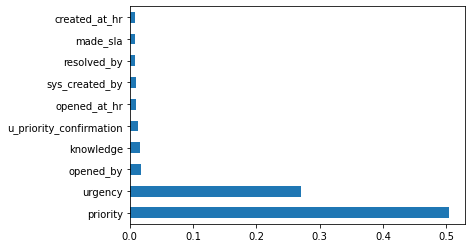

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_smote,y_train_smote)
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_smote, y_train_smote)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

priority                   1.092577
urgency                    0.792851
caller_id                  0.598150
opened_by                  0.552269
sys_mod_count              0.458713
updated_minute             0.453165
resolved_by                0.411795
updated_hr                 0.384405
assigned_to                0.382384
sys_updated_by             0.370023
assignment_group           0.339749
sys_created_by             0.314669
subcategory                0.296491
category                   0.280123
updated_day                0.271733
opened_at_hr               0.243937
opened_at_minute           0.233605
incident_state             0.227826
updated_month              0.226273
u_symptom                  0.221890
resolved_at_minute         0.221723
location                   0.218930
closed_at_hr               0.210872
opened_at_day              0.192910
resolved_at_day            0.192533
resolved_at_hr             0.192177
closed_at_day              0.185041
reassignment_count         0

In [19]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)
feature = pd.Series(model.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)

priority                   9.843922e-01
urgency                    1.442531e-02
sys_mod_count              1.730575e-04
resolved_by                1.648742e-04
resolved_at_minute         1.618852e-04
opened_by                  1.465192e-04
closed_code                8.380432e-05
closed_at_hr               8.278468e-05
created_at_hr              6.465954e-05
created_at_minute          5.319334e-05
u_symptom                  5.246409e-05
closed_at_month            4.103990e-05
opened_at_month            2.295085e-05
closed_at_day              2.249887e-05
location                   2.234044e-05
opened_at_day              2.128807e-05
created_at_day             1.081052e-05
updated_minute             1.054398e-05
sys_updated_by             1.037528e-05
reassignment_count         9.812034e-06
sys_created_by             9.566733e-06
caller_id                  7.972278e-06
subcategory                6.354290e-06
active                     2.639885e-06
resolved_at_hr             1.011471e-06


In [20]:
mutual_info.sort_values(ascending=False)

priority                   1.092577
urgency                    0.792851
caller_id                  0.598150
opened_by                  0.552269
sys_mod_count              0.458713
updated_minute             0.453165
resolved_by                0.411795
updated_hr                 0.384405
assigned_to                0.382384
sys_updated_by             0.370023
assignment_group           0.339749
sys_created_by             0.314669
subcategory                0.296491
category                   0.280123
updated_day                0.271733
opened_at_hr               0.243937
opened_at_minute           0.233605
incident_state             0.227826
updated_month              0.226273
u_symptom                  0.221890
resolved_at_minute         0.221723
location                   0.218930
closed_at_hr               0.210872
opened_at_day              0.192910
resolved_at_day            0.192533
resolved_at_hr             0.192177
closed_at_day              0.185041
reassignment_count         0

In [25]:
X=X_train_smote[['category','subcategory','caller_id','u_symptom','opened_by','location']]
y=y_train_smote.copy()
X_test_final=X_test[['category','subcategory','caller_id','u_symptom','opened_by','location']]

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [27]:
model=RandomForestClassifier(n_estimators=280,n_jobs=-1,random_state=0,criterion='entropy' )

In [28]:
model.fit(X,y)
y_pred=model.predict(X_test_final)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9835113139201205
[[ 1001    75     7]
 [  295 39694   270]
 [   15    39  1118]]
              precision    recall  f1-score   support

           1       0.76      0.92      0.84      1083
           2       1.00      0.99      0.99     40259
           3       0.80      0.95      0.87      1172

    accuracy                           0.98     42514
   macro avg       0.85      0.95      0.90     42514
weighted avg       0.99      0.98      0.98     42514



In [29]:
import pickle

In [30]:
pickle.dump(model,open('model.pkl','wb'))

In [32]:
model= pickle.load(open('model.pkl','rb'))
var=model.predict([[45,220,3038,253,433,204]])

output=""
if var[0]==1:
    output="High"
elif var[0]==3:
    output="Low"
else:
    output="Medium"

print('Incident Impact is {}'.format(output))

Incident Impact is Low
